In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('abalone_original.csv')
df.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [23]:
df.rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [24]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
rings             0
dtype: int64

###### **Age = rings + 1.5 gives the age in years**

In [25]:
df['age'] = df.rings.apply(lambda x: x+1.5)
df.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [26]:
X = df.drop(['rings','age'],axis=1)
y = df.age

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X.sex = encoder.fit_transform(X.sex)

In [28]:
X.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,2,91,73,19,102.8,44.9,20.2,30.0
1,2,70,53,18,45.1,19.9,9.7,14.0
2,0,106,84,27,135.4,51.3,28.3,42.0
3,2,88,73,25,103.2,43.1,22.8,31.0
4,1,66,51,16,41.0,17.9,7.9,11.0


In [29]:
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [31]:
X_train.shape

(3132, 8)

#### **Random Forest Regressor**

In [32]:
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
print(mean_squared_error(y_test, y_pred1) ** 0.5)

2.176255486514332


#### **Linear Regression**

In [33]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(mean_squared_error(y_test, y_pred2) ** 0.5)

2.139462438680364


#### **XGBOOST Regressor**

In [34]:
model3 = XGBRFRegressor()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print(mean_squared_error(y_test, y_pred3) ** 0.5)

2.166844382990517


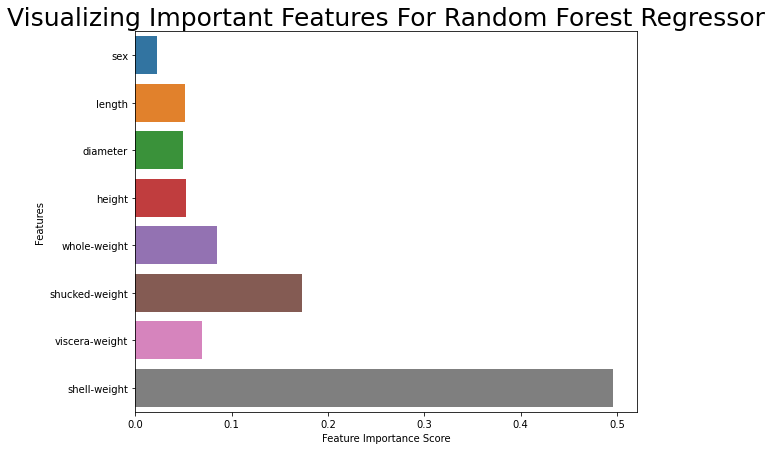

In [36]:
plt.figure(figsize=(9,7))
feature_imp1 = model1.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest Regressor",{'fontsize':25})
plt.show();